### We will analyze the sentiment of the public reviews for Amazon Alexa. We will use the TextBlob sentiment analyzer to do so.

### Import necessary libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split 
from textblob.classifiers import NaiveBayesClassifier

### Load Data
#### About the Data
This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

In [31]:
df = pd.read_csv("amazon_alexa.csv", sep = "	")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Analyse Data

In [3]:
df.shape

(3150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


Info show here no null value in data

In [5]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [34]:
data = df.drop('date', axis = 1)
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


### convert feedback 1 and 0 to pos and neg 

In [35]:
data['feedback'] = np.where(data['feedback'].isin([1]), 'pos', 'neg')
data.head(3)

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,pos
1,5,Charcoal Fabric,Loved it!,pos
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",pos


## Data Visualizations

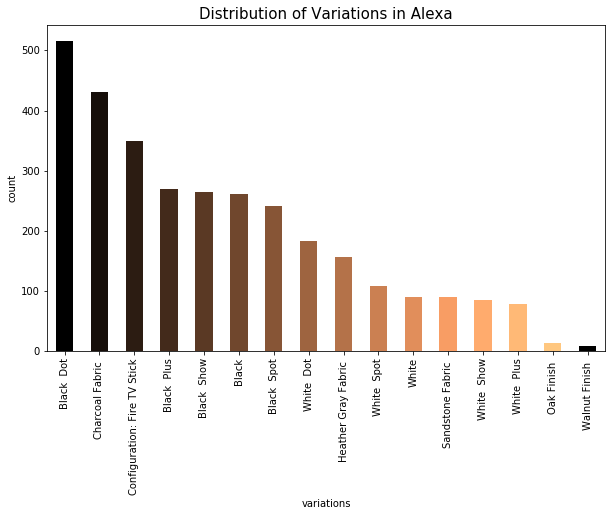

In [38]:
color = plt.cm.copper(np.linspace(0, 1, 15))
data['variation'].value_counts().plot.bar(color = color, figsize = (10, 6))
plt.title('Distribution of Variations in Alexa', fontsize = 15)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

the plot shows in different Variatios of Amazon Alexa, the Black Dot is the most popular variation of Amazon Alexa with more than 500 units out of 3150 samples.

### Plot the Rating Column
Let's see the distribution of rating:

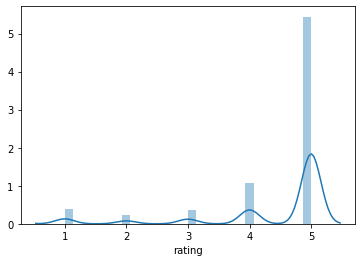

In [8]:
sns.distplot(data['rating'])

You can see that most of the ratings are highly positive i.e. 5. 
### Bar plot
for the ratings to have a better look at the number of records for each rating.

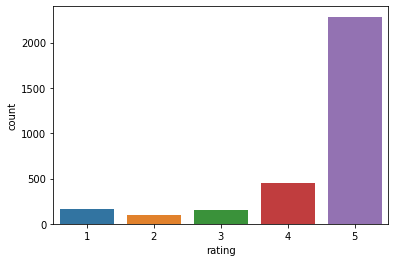

In [39]:
sns.countplot(x='rating', data=data)

Let's randomly select a verified_reviews and find its polarity using TextBlob. Let's take a look at verified_reviews number 500.

## Sentiment Analysis
Sentiment analysis is determining the attitude(positive or negative or neutral) of the user.

It return polarity(varies from -1 to 1 , for positive sentence 1 and for negative sentence -1) and subjectivity(refer personal opinion, varies from 0 to 1, where 0.0 is very objective and 1.0 is very subjective)

In [40]:
data['verified_reviews'][500]

"There's really no dislike for Alexa( dot) I thought cortna was cool but Alexa is an awesome application to the family. Unbelievable device which seems alive. A must get."

Let's find the sentiment of the 500th 'verified_reviews'.

In [41]:
text_object = TextBlob(data['verified_reviews'][500])
print(text_object.sentiment)

Sentiment(polarity=0.22000000000000003, subjectivity=0.65)


The output shows that the review is positive with a high subjectivity.

### Add a column for sentiment polarity in our dataset 

In [42]:
def polarity(review):
    return TextBlob(review).sentiment.polarity

data['Sentiment_Polarity'] = data['verified_reviews'].apply(polarity)
data.head()

,rating,variation,verified_reviews,feedback,Sentiment_Polarity
0,5,Charcoal Fabric,Love my Echo!,pos,0.625
1,5,Charcoal Fabric,Loved it!,pos,0.875
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",pos,-0.100
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,pos,0.350
4,5,Charcoal Fabric,Music,pos,0.000


### Plot the distribution of polarity

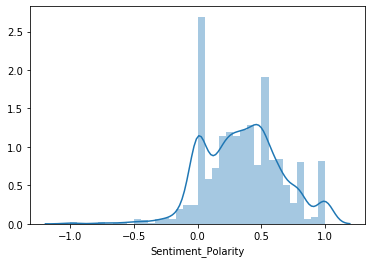

In [43]:
sns.distplot(data['Sentiment_Polarity'])

plot shows most of the reviews are positive and have polarity between 0 and 1.0.

### Plot the average polarity for each  rating

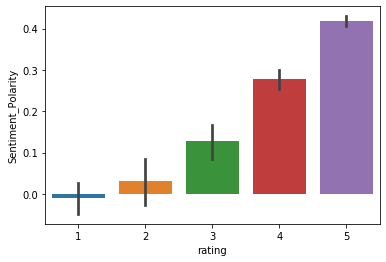

In [44]:
sns.barplot(x='rating', y='Sentiment_Polarity', data=data)

The output clearly shows that the reviews with high rating scores have high positive polarities.

### Find most negative reviews and most possitive reviews

In [45]:
most_negative = data[data.Sentiment_Polarity == -1].verified_reviews.head()
print(most_negative)

661     This Echo Dot is horrible. The volume on my ph...
1340    Get rid of the &#34;Thongs To Try&#34; screen!...
1386    Invasive and scared the crap out of me for spe...
1903             Terrible. Stopped working after one day.
Name: verified_reviews, dtype: object


In [46]:
data['verified_reviews'][661]

'This Echo Dot is horrible. The volume on my phone is louder than than this device. My boss has one at this is not the case'

output shows this statement is highly negative.

In [47]:
most_positive = data[data.Sentiment_Polarity == 1].verified_reviews.head()
print(most_positive)

34                               This device is awesome!
75                                          It’s awesome
82     Great technology!! Can't believe the speaker v...
119         Excellent product, set up with ease as well.
173    BEST father's day gift. Dad joked to my mom th...
Name: verified_reviews, dtype: object


In [48]:
data['verified_reviews'][173]

"BEST father's day gift. Dad joked to my mom that Alexa will be the one listening to all of his (repeated) stories going forward."

output shows this statement is highly positive.

## Text Classification
- For build a simple text classification first, we need to prepare a training and testing data.
- The classification model will be trained on the training dataset and will be evaluated on the test dataset.

In [49]:
x = data['verified_reviews']
y = data['feedback']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [50]:
train = [x for x in zip(x_train,y_train)]
test = [x for x in zip(x_test, y_test)]

**Now we’ll create a Naive Bayes classifier, passing the training data into the constructor.**

In [51]:
clf = NaiveBayesClassifier(train)

### Evaluating Classifiers
find the accuracy of your algorithm on the test set.

In [52]:
print(clf.accuracy(test))

0.8846560846560847


In [53]:
clf.show_informative_features(10)

Most Informative Features
         contains(until) = True              neg : pos    =     46.8 : 1.0
           contains(NOT) = True              neg : pos    =     46.8 : 1.0
 contains(disappointing) = True              neg : pos    =     46.8 : 1.0
          contains(send) = True              neg : pos    =     32.4 : 1.0
          contains(hope) = True              neg : pos    =     32.4 : 1.0
         contains(spent) = True              neg : pos    =     32.4 : 1.0
        contains(Things) = True              neg : pos    =     32.4 : 1.0
        contains(return) = True              neg : pos    =     32.4 : 1.0
          contains(mode) = True              neg : pos    =     32.4 : 1.0
        contains(switch) = True              neg : pos    =     32.4 : 1.0


## Conclusion
- Form this model analysis it is clear  show reviews are positive and have polarity between 0 and 1.0 and reviews with high rating scores have high positive polarities. **Accuracy** of our model is **0.8846560846560847**. 
- So it is clear most of  public reviews for Amazon Alexa is positive.